In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import specializer as s

In [151]:
def network_vis(G, iter_matrix=False, title="Network Visualization", save_img=False, filename='network_viz'):
    """ Creates a visualization of the network G
    Parameters:
        G (DirectedGraph): A DirectedGraph object to visualize
        iter_matrix (ndarray): allows you to explicitly pass in the dynamics matrix of G
            If left as False, then we run the dynamics simulation here
        title (str): Title of visualization
        save_img (bool): if True, saves the visualization with filename 'filename'
        filename (str): filename
    """
    # find synchronized communities
    communities = G.detect_sync(iters=80)
    
    # create a dictionary mapping each node to its community
    group_dict = {}
    for i in range(len(communities)):
        for node in communities[i][0]:
            group_dict[node] = i
    
    # create (and relabel) a networkx graph object
    nxG = nx.relabel.relabel_nodes(nx.DiGraph(G.A.T), G.labeler)
    
    # set community membership as an attribute of nxG
    nx.set_node_attributes(nxG, group_dict, name='community')
    
    # list of community number in order of how the nodes are stored
    colors = [group_dict[node] for node in nxG.nodes()]  
    
    plt.figure()
    
#     nx.draw_networkx(nxG, pos=nx.drawing.spectral_layout(nxG), node_size=1000, 
#                      arrowsize=20, node_color=colors, cmap=plt.cm.Set3)
    nx.draw_networkx(nxG, node_size=1000, arrowsize=20, node_color=colors, cmap=plt.cm.Set3)
    plt.title(title)
    if save_img:
        plt.savefig(filename)
    
    plt.show()

In [137]:
def sig(x):
    return np.tanh(x)
def sig2(x):
    return -2 * np.tanh(x)
def zero(x):
    return 0
def func1(x):
    return 9/10 * x + 7/4
def func2(x):
    return 9/10 * x + 5/4
def func3(x):
    return 9/10 * x + 2/4

gen_labels = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

A = np.array([[0,0,1],[1,0,0],[1,1,0]])
labels = ['x1', 'x2', 'x3']

f = np.array([[zero, zero, sig2],
              [ sig, zero, zero],
              [ sig,  sig, zero]])
a = np.array([func1, func2, func3])

In [138]:
G = s.DirectedGraph(A, (a, f), labels=labels)

In [139]:
G.detect_sync()

[(('x1',), True), (('x2',), True), (('x3',), True)]

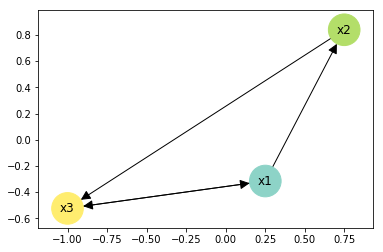

In [140]:
network_vis(G)

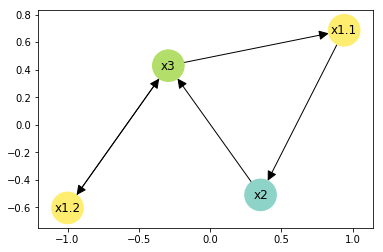

In [141]:
G.specialize(['x2','x3'])
network_vis(G)

In [119]:
B = np.array([[0, 0, 1, 1], 
              [1, 0, 0, 0], 
              [0, 1, 0, 0], 
              [0, 1, 0, 0]])

fb = np.array([[zero, zero, sig, sig], 
               [sig, zero, zero, zero], 
               [zero, sig, zero, zero], 
               [zero, sig, zero, zero]])
ab = np.array([lambda x: 9/10*x]*4)

In [142]:
G2=s.DirectedGraph(B, (ab, fb), labels=gen_labels[:4])

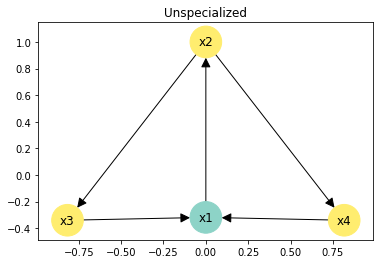

In [148]:
network_vis(G2, save_img=True, title='Unspecialized', filename='Vis_1')

In [149]:
G2.specialize(['x1'])

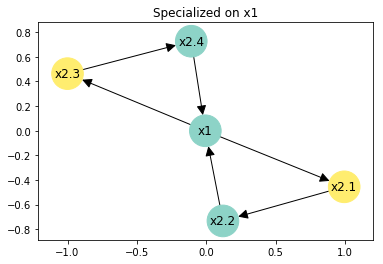

In [152]:
network_vis(G2, save_img=True, title='Specialized on x1', filename='vis_2')

In [136]:
G2.labeler

{0: 'x1', 1: 'x2.1', 2: 'x2.2', 3: 'x2.3', 4: 'x2.4'}